In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from numpy.random import rand
import numpy as np

In [2]:
TRAJ_NAME = 'data/results_traj.txt'
CLOUD_NAME = 'data/2021-02-05_16-40-57_100pct_shade_world.txt'

with open(TRAJ_NAME, 'r') as fp:
    traj_lines = fp.readlines()

with open('data/traj.csv', 'w') as fp:
    fp.writelines([x.replace(' ', ',').replace('%', '') for x in traj_lines])

with open(CLOUD_NAME, 'r') as fp:
    cloud_lines = fp.readlines()

with open('data/cloud.csv', 'w') as fp:
    fp.writelines([x.replace(' ', ',').replace('//', '') for x in cloud_lines])

In [3]:
import math
 
def euler_from_quaternion(x, y, z, w):
    """
    Convert a quaternion into euler angles (roll, pitch, yaw)
    roll is rotation around x in radians (counterclockwise)
    pitch is rotation around y in radians (counterclockwise)
    yaw is rotation around z in radians (counterclockwise)
    """
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll_x = math.atan2(t0, t1)
    
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch_y = math.asin(t2)
    
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw_z = math.atan2(t3, t4)
    
    return roll_x, pitch_y, yaw_z # in radians

In [4]:
df_cloud = pd.read_csv('data/cloud.csv')
df_cloud.iloc[:10,:]

,time,x,y,z,r,g,b
0,1.612543e+09,0.4383,-2.6296,0.7257,5,5,5
1,1.612543e+09,0.5088,-1.8284,0.4815,9,9,9
2,1.612543e+09,0.4385,-2.6154,0.7320,8,8,8
3,1.612543e+09,0.4800,-1.9896,0.5415,14,14,14
4,1.612543e+09,0.5104,-1.8265,0.4880,9,9,9
5,1.612543e+09,0.4448,-2.6355,0.7471,4,4,4
6,1.612543e+09,0.4817,-1.9875,0.5485,11,11,11
7,1.612543e+09,0.5120,-1.8245,0.4946,7,7,7
8,1.612543e+09,0.5444,-1.7024,0.4522,4,4,4
9,1.612543e+09,0.4423,-2.6060,0.7494,4,4,4


[]

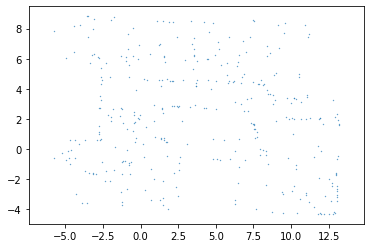

In [5]:
prob_inclusion_any = 0.0005
prob_inclusion_within = 0.02
center_quantile = 0.2
delta_quantile = 0.1
top_quantile = min(1, center_quantile + delta_quantile * 0.5)
bottom_quantile = max(0, center_quantile - delta_quantile * 0.5)

df_cloud = df_cloud.loc[
    ((df_cloud['z'].apply(lambda x: rand() <= prob_inclusion_any)) | 
    ((df_cloud['z'].apply(lambda x: rand() <= prob_inclusion_within)) &
    (df_cloud['z'] < df_cloud['z'].quantile(top_quantile)) & 
    (df_cloud['z'] > df_cloud['z'].quantile(bottom_quantile)))) &
    (df_cloud['x'] > -7) &
    (df_cloud['x'] < 10) &
    (df_cloud['y'] > -15) &
    (df_cloud['y'] < 8), :] 
df_sliced = df_cloud.iloc[::100, :]
plt.scatter(-df_sliced['y'], df_sliced['x'], 0.1)
plt.axis('equal')
plt.plot()

In [6]:
df_cloud['time'] = df_cloud['time'].apply(lambda x: datetime.fromtimestamp(x))
df_cloud['color'] = df_cloud.apply(lambda x: 1 - (x['r'] + x['g'] + x['b']) / 255 / 3, axis=1)
df_cloud['type'] = df_cloud['time'].apply(lambda x: 'cloud')
df_cloud = df_cloud.drop(['r','g','b'], axis=1)
df_cloud.iloc[:10,:]

,time,x,y,z,color,type
403,2021-02-05 17:41:15.157160,0.4825,-1.6590,0.7358,0.807843,cloud
412,2021-02-05 17:41:15.157190,0.6860,-1.3547,0.5589,0.917647,cloud
568,2021-02-05 17:41:15.158040,0.7238,-1.3657,0.6402,0.956863,cloud
904,2021-02-05 17:41:15.159880,0.7980,-1.3554,0.8154,0.862745,cloud
3400,2021-02-05 17:41:15.169570,0.6530,-0.8437,2.6173,0.972549,cloud
6400,2021-02-05 17:41:15.182430,1.5008,1.1814,2.5825,0.545098,cloud
9932,2021-02-05 17:41:15.195320,-1.0585,4.1191,2.6090,0.200000,cloud
10756,2021-02-05 17:41:15.197040,0.3814,2.8323,0.6935,0.749020,cloud
11579,2021-02-05 17:41:15.198870,-0.8489,5.2982,0.8072,0.960784,cloud
11914,2021-02-05 17:41:15.199620,-1.2829,3.1949,0.5249,0.584314,cloud


In [7]:
df_traj = pd.read_csv('data/traj.csv')
df_traj.iloc[:10,:]

,time,x,y,z,q0,q1,q2,q3,userfields
0,1.612543e+09,-0.021289,-0.007929,0.009596,0.692996,0.139048,-0.133375,0.694718,NaN
1,1.612543e+09,-0.021389,-0.008091,0.009477,0.693018,0.139075,-0.133316,0.694703,NaN
2,1.612543e+09,-0.021495,-0.008259,0.009353,0.693036,0.139095,-0.133289,0.694686,NaN
3,1.612543e+09,-0.021608,-0.008429,0.009228,0.693030,0.139084,-0.133310,0.694689,NaN
4,1.612543e+09,-0.021722,-0.008594,0.009100,0.693009,0.139056,-0.133324,0.694714,NaN
5,1.612543e+09,-0.021836,-0.008764,0.008969,0.693010,0.139013,-0.133379,0.694710,NaN
6,1.612543e+09,-0.021934,-0.008939,0.008834,0.692996,0.139032,-0.133408,0.694715,NaN
7,1.612543e+09,-0.022027,-0.009113,0.008696,0.693004,0.139046,-0.133418,0.694702,NaN
8,1.612543e+09,-0.022114,-0.009276,0.008556,0.693013,0.139062,-0.133395,0.694695,NaN
9,1.612543e+09,-0.022198,-0.009431,0.008412,0.693006,0.139077,-0.133329,0.694711,NaN


In [8]:
df_traj['time'] = df_traj['time'].apply(lambda x: datetime.fromtimestamp(x))
df_traj['type'] = df_traj['time'].apply(lambda x: 'traj')
df_traj[['roll','pitch','yaw']] = df_traj.apply(lambda row: euler_from_quaternion(
    row['q0'],
    row['q1'],
    row['q2'],
    row['q3']), axis=1, result_type="expand")
df_traj = df_traj.drop(['q0','q1','q2','q3','userfields'], axis=1)
df_traj.iloc[:10,:]

,time,x,y,z,type,roll,pitch,yaw
0,2021-02-05 17:41:14.494820,-0.021289,-0.007929,0.009596,traj,1.569885,0.387694,0.007998
1,2021-02-05 17:41:14.506680,-0.021389,-0.008091,0.009477,traj,1.569965,0.387648,0.008137
2,2021-02-05 17:41:14.512600,-0.021495,-0.008259,0.009353,traj,1.570031,0.387638,0.008217
3,2021-02-05 17:41:14.524690,-0.021608,-0.008429,0.009228,traj,1.570009,0.387653,0.008168
4,2021-02-05 17:41:14.536660,-0.021722,-0.008594,0.009100,traj,1.569927,0.387632,0.008090
5,2021-02-05 17:41:14.542750,-0.021836,-0.008764,0.008969,traj,1.569906,0.387651,0.007945
6,2021-02-05 17:41:14.554730,-0.021934,-0.008939,0.008834,traj,1.569874,0.387718,0.007925
7,2021-02-05 17:41:14.566650,-0.022027,-0.009113,0.008696,traj,1.569907,0.387753,0.007938
8,2021-02-05 17:41:14.572650,-0.022114,-0.009276,0.008556,traj,1.569943,0.387744,0.008000
9,2021-02-05 17:41:14.584670,-0.022198,-0.009431,0.008412,traj,1.569932,0.387670,0.008115


In [ ]:
df_traj = df_traj.iloc[::int(df_traj.shape[0]/2000),:]

In [10]:
def rotate(x, y, angle):
    c = np.cos(angle)
    s = np.sin(angle)
    return (x * c - y * s, x * s + y * c)

In [11]:
ROTATION_ANGLE = 2 / 180 * np.pi

df = pd.concat([df_cloud, df_traj], axis=0)
df[['x','y']] = df.apply(lambda row: rotate(row['x'], row['y'], ROTATION_ANGLE), axis=1, result_type="expand")
df['time'] = df['time'] - df['time'].min() + datetime(2000, 1, 1)
print(df['time'].min())
print(df['time'].max())
df.set_index(['time','type'], inplace=True)

2000-01-01 00:00:00
2000-01-01 00:04:07.649770


In [12]:
df.to_csv('data/cleaned.csv')